# Lab 4: Programming Basics for Economists
## From Python Fundamentals to PyTorch Tensors

---

### 🎯 Lab Philosophy

This lab builds programming foundations systematically. We start with Python basics and progressively introduce PyTorch—the library we'll use for machine learning in later topics.

### 📚 Coverage

**Part 1: Python Fundamentals**
- Variables and data types
- Data structures: lists, tuples, dictionaries
- Control structures: if/else, loops
- Functions

**Part 2: Object-Oriented Programming**
- Classes and objects
- Building an `EconomicAgent` class

**Part 3: NumPy Essentials**
- Arrays and vectorization
- Why NumPy matters for economics

**Part 4: Introduction to PyTorch**
- Tensors: creation and operations
- Autograd: automatic differentiation
- Building neural networks with `nn.Module`

**Part 5: Applications**
- Working with real data: FRED API
- Solving a two-period consumption problem
- Training a simple neural network

---

In [17]:
# Standard Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import torch
import torch.nn as nn
import torch.optim as optim

print(f"NumPy Version: {np.__version__}")
print(f"PyTorch Version: {torch.__version__}")

NumPy Version: 2.3.4
PyTorch Version: 2.9.1


# Part 1: Python Fundamentals

Python is a high-level, general-purpose programming language. Its syntax is clear and intuitive, making it popular for scientific computing.

## 1.1 Variables and Data Types

Python has four basic data types:
- **Integers** (`int`): Whole numbers
- **Floats** (`float`): Decimal numbers
- **Strings** (`str`): Text
- **Booleans** (`bool`): True/False

In [1]:
# Basic Data Types
x = 42              # Integer
pi = 3.14159        # Float
message = "Hello"   # String
is_true = True      # Boolean

print(f"x = {x}, type: {type(x)}")
print(f"pi = {pi}, type: {type(pi)}")
print(f"message = {message}, type: {type(message)}")
print(f"is_true = {is_true}, type: {type(is_true)}")

x = 42, type: <class 'int'>
pi = 3.14159, type: <class 'float'>
message = Hello, type: <class 'str'>
is_true = True, type: <class 'bool'>


## 1.2 Arithmetic and Logical Operators

In [2]:
# Arithmetic Operators
a, b = 17, 4

print(f"Addition: {a} + {b} = {a + b}")
print(f"Subtraction: {a} - {b} = {a - b}")
print(f"Multiplication: {a} * {b} = {a * b}")
print(f"Division: {a} / {b} = {a / b}")
print(f"Exponent: {a} ** {b} = {a ** b}")
print(f"Floor Division: {a} // {b} = {a // b}")  # Quotient without remainder
print(f"Modulo: {a} % {b} = {a % b}")            # Remainder

Addition: 17 + 4 = 21
Subtraction: 17 - 4 = 13
Multiplication: 17 * 4 = 68
Division: 17 / 4 = 4.25
Exponent: 17 ** 4 = 83521
Floor Division: 17 // 4 = 4
Modulo: 17 % 4 = 1


In [3]:
# Logical Operators
x, y = 5, 10

print(f"x == y: {x == y}")   # Equal
print(f"x != y: {x != y}")   # Not equal
print(f"x < y: {x < y}")     # Less than
print(f"x > y: {x > y}")     # Greater than
print(f"x <= y: {x <= y}")   # Less than or equal

# Combining with and/or/not
print(f"(x < y) and (y < 20): {(x < y) and (y < 20)}")
print(f"(x > y) or (y < 20): {(x > y) or (y < 20)}")
print(f"not (x > y): {not (x > y)}")

x == y: False
x != y: True
x < y: True
x > y: False
x <= y: True
(x < y) and (y < 20): True
(x > y) or (y < 20): True
not (x > y): True


## 1.3 Data Structures

Python provides several ways to store collections of data:

| Structure | Ordered | Mutable | Syntax |
|-----------|---------|---------|--------|
| List | Yes | Yes | `[1, 2, 3]` |
| Tuple | Yes | No | `(1, 2, 3)` |
| Set | No | Yes | `{1, 2, 3}` |
| Dictionary | No* | Yes | `{"a": 1, "b": 2}` |

*Dictionaries preserve insertion order in Python 3.7+

In [4]:
# Lists: Ordered, mutable sequences
my_list = [1, 2, 3, "hello", True]

print(f"List: {my_list}")
print(f"First element (index 0): {my_list[0]}")
print(f"Last element (index -1): {my_list[-1]}")
print(f"Slice [1:4]: {my_list[1:4]}")

# Modifying lists
my_list[0] = 100
my_list.append("new item")
print(f"Modified list: {my_list}")

List: [1, 2, 3, 'hello', True]
First element (index 0): 1
Last element (index -1): True
Slice [1:4]: [2, 3, 'hello']
Modified list: [100, 2, 3, 'hello', True, 'new item']


In [5]:
# Tuples: Ordered, immutable sequences
my_tuple = (1, 2, 3, "hello")

print(f"Tuple: {my_tuple}")
print(f"First element: {my_tuple[0]}")

# Tuples are immutable - this would cause an error:
# my_tuple[0] = 100  # TypeError!

Tuple: (1, 2, 3, 'hello')
First element: 1


In [6]:
# Dictionaries: Key-value pairs
params = {
    "beta": 0.96,
    "alpha": 0.33,
    "delta": 0.1,
    "name": "RBC Model"
}

print(f"Dictionary: {params}")
print(f"Access by key: beta = {params['beta']}")

# Modifying dictionaries
params["gamma"] = 2.0  # Add new key
params["beta"] = 0.99  # Update existing
print(f"Updated: {params}")

Dictionary: {'beta': 0.96, 'alpha': 0.33, 'delta': 0.1, 'name': 'RBC Model'}
Access by key: beta = 0.96
Updated: {'beta': 0.99, 'alpha': 0.33, 'delta': 0.1, 'name': 'RBC Model', 'gamma': 2.0}


## 1.4 Control Structures

### Conditional Statements (if/elif/else)

In [8]:
x = 9

if x > 0:
    print("Positive")
elif x < 0:
    print("Negative")
else:
    print("Zero")

Positive


### Loops (for and while)

In [13]:
# For loop: iterate over a sequence
print("For loop with range:")
for i in range(5):  # 0, 1, 2, 3, 4
    print(f"  i = {i}")

# For loop over a list
print("\nFor loop over list:")
values = [10, 20, 30]
for v in values:
    print(f"  value = {v}")

For loop with range:
  i = 0
  i = 1
  i = 2
  i = 3
  i = 4

For loop over list:
  value = 10
  value = 20
  value = 30


In [ ]:
# While loop: repeat while condition is true
count = 0
while count < 5:
    print(f"count = {count}")
    count += 1  # Equivalent to: count = count + 1

## 1.5 Functions

Functions encapsulate reusable code. They take inputs (arguments) and return outputs.

In [14]:
# Simple function
def greet(name):
    """Print a greeting message."""
    print(f"Hello, {name}!")

greet("Economist")

Hello, Economist!


In [15]:
# Function with return value
def add(a, b):
    """Return the sum of two numbers."""
    return a + b

result = add(3, 5)
print(f"add(3, 5) = {result}")

add(3, 5) = 8


In [18]:
# Function with default arguments
def crra_utility(c, gamma=2.0):
    """CRRA utility function: u(c) = c^(1-gamma) / (1-gamma)"""
    if gamma == 1:
        return np.log(c)
    else:
        return (c ** (1 - gamma)) / (1 - gamma)

# Using default gamma
print(f"u(2) with gamma=2: {crra_utility(2):.4f}")

# Overriding default
print(f"u(2) with gamma=1 (log): {crra_utility(2, gamma=1):.4f}")

u(2) with gamma=2: -0.5000
u(2) with gamma=1 (log): 0.6931


---

# Part 2: Object-Oriented Programming

## 2.1 Why Classes?

In previous labs, we used loose variables (`alpha`, `beta`). As models grow complex, this becomes messy.

**Classes** bundle data (attributes) and functions (methods) together:
- **Encapsulation**: Keep parameters and functions together
- **Reusability**: Create multiple agents with different preferences
- **Organization**: Clear structure for complex models

## 2.2 Anatomy of a Class

In [19]:
class Dog:
    """A simple class representing a dog."""
    
    def __init__(self, name):
        """Constructor: called when creating a new Dog."""
        self.name = name  # Instance attribute
    
    def bark(self):
        """Method: a function belonging to the class."""
        print("Woof!")
    
    def fetch(self, toy):
        """Method with an argument."""
        print(f"{self.name} fetched the {toy}!")

# Create an instance (object)
my_dog = Dog("Buddy")

# Access attribute
print(f"Dog's name: {my_dog.name}")

# Call methods
my_dog.bark()
my_dog.fetch("ball")

Dog's name: Buddy
Woof!
Buddy fetched the ball!


## 2.3 Economic Agent Class

Let's build a class for an economic agent with CRRA preferences.

In [20]:
class EconomicAgent:
    """An economic agent with CRRA preferences."""
    
    def __init__(self, beta=0.96, gamma=2.0):
        """
        Initialize agent with preference parameters.
        
        Parameters:
        -----------
        beta : float
            Discount factor (0 < beta < 1)
        gamma : float
            Coefficient of relative risk aversion
        """
        self.beta = beta
        self.gamma = gamma
    
    def utility(self, c):
        """CRRA utility: u(c) = c^(1-gamma) / (1-gamma)"""
        if c <= 0:
            return -1e10  # Large negative for infeasible consumption
        if self.gamma == 1:
            return np.log(c)
        else:
            return (c ** (1 - self.gamma)) / (1 - self.gamma)
    
    def marginal_utility(self, c):
        """Marginal utility: u'(c) = c^(-gamma)"""
        if c <= 0:
            return 1e10
        return c ** (-self.gamma)
    
    def __repr__(self):
        """String representation for printing."""
        return f"EconomicAgent(beta={self.beta}, gamma={self.gamma})"

# Create two different agents
patient_agent = EconomicAgent(beta=0.99, gamma=2.0)
risky_agent = EconomicAgent(beta=0.96, gamma=0.5)

print(patient_agent)
print(risky_agent)
print(f"\nPatient agent utility of c=10: {patient_agent.utility(10):.4f}")
print(f"Risky agent utility of c=10: {risky_agent.utility(10):.4f}")

EconomicAgent(beta=0.99, gamma=2.0)
EconomicAgent(beta=0.96, gamma=0.5)

Patient agent utility of c=10: -0.1000
Risky agent utility of c=10: 6.3246


---

# Part 3: NumPy Essentials

**NumPy** is the foundation of scientific computing in Python. It provides:
- Multi-dimensional arrays (`ndarray`)
- Fast vectorized operations
- Mathematical functions

## 3.1 Creating Arrays

In [21]:
# From a list
arr1 = np.array([1, 2, 3, 4, 5])
print(f"1D array: {arr1}")
print(f"Shape: {arr1.shape}, Dtype: {arr1.dtype}")

# 2D array (matrix)
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
print(f"\n2D array:\n{arr2}")
print(f"Shape: {arr2.shape}")

1D array: [1 2 3 4 5]
Shape: (5,), Dtype: int64

2D array:
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [22]:
# Special arrays
zeros = np.zeros((3, 4))       # 3x4 matrix of zeros
ones = np.ones((2, 3))         # 2x3 matrix of ones
identity = np.eye(3)           # 3x3 identity matrix
linspace = np.linspace(0, 1, 5)  # 5 points from 0 to 1
arange = np.arange(0, 10, 2)     # 0, 2, 4, 6, 8

print(f"Zeros:\n{zeros}")
print(f"\nLinspace: {linspace}")
print(f"Arange: {arange}")

Zeros:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Linspace: [0.   0.25 0.5  0.75 1.  ]
Arange: [0 2 4 6 8]


## 3.2 Vectorized Operations

NumPy operations apply to **entire arrays** without explicit loops.

In [23]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([10, 20, 30, 40, 50])

# Element-wise operations
print(f"x + y = {x + y}")
print(f"x * y = {x * y}")
print(f"x ** 2 = {x ** 2}")

# Mathematical functions
print(f"sqrt(x) = {np.sqrt(x)}")
print(f"exp(x) = {np.exp(x)}")
print(f"log(x) = {np.log(x)}")

x + y = [11 22 33 44 55]
x * y = [ 10  40  90 160 250]
x ** 2 = [ 1  4  9 16 25]
sqrt(x) = [1.         1.41421356 1.73205081 2.         2.23606798]
exp(x) = [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
log(x) = [0.         0.69314718 1.09861229 1.38629436 1.60943791]


In [ ]:
# Aggregation
data = np.array([1, 2, 3, 4, 5])

print(f"Sum: {np.sum(data)}")
print(f"Mean: {np.mean(data)}")
print(f"Std: {np.std(data):.4f}")
print(f"Max: {np.max(data)}, ArgMax: {np.argmax(data)}")

## 3.3 Why Vectorization Matters

Vectorized code is **much faster** than Python loops.

In [24]:
import time

N = 1000000
x = np.random.rand(N)

# Python loop
start = time.time()
result_loop = sum([xi ** 2 for xi in x])
time_loop = time.time() - start

# NumPy vectorized
start = time.time()
result_numpy = np.sum(x ** 2)
time_numpy = time.time() - start

print(f"Python loop: {time_loop:.4f} seconds")
print(f"NumPy:       {time_numpy:.4f} seconds")
print(f"Speedup:     {time_loop / time_numpy:.1f}x")

Python loop: 0.0968 seconds
NumPy:       0.0012 seconds
Speedup:     83.9x


---

# Part 4: Introduction to PyTorch

**PyTorch** is a deep learning library. Its core data structure is the **Tensor**—similar to NumPy arrays but with two superpowers:

1. **GPU Acceleration**: Tensors can run on GPUs for massive speedups
2. **Autograd**: Automatic differentiation for computing gradients

## 4.1 Tensors: Creation

In [25]:
# From a list
t1 = torch.tensor([1, 2, 3, 4, 5])
print(f"1D Tensor: {t1}")
print(f"Shape: {t1.shape}, Dtype: {t1.dtype}")

# 2D Tensor
t2 = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(f"\n2D Tensor:\n{t2}")
print(f"Shape: {t2.shape}")

1D Tensor: tensor([1, 2, 3, 4, 5])
Shape: torch.Size([5]), Dtype: torch.int64

2D Tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])
Shape: torch.Size([2, 3])


In [26]:
# Special tensors
zeros = torch.zeros((3, 4))
ones = torch.ones((2, 3))
rand = torch.rand((2, 3))        # Uniform [0, 1)
randn = torch.randn((2, 3))      # Standard normal
arange = torch.arange(0, 10, 2)  # 0, 2, 4, 6, 8

print(f"Random tensor:\n{rand}")
print(f"\nArange: {arange}")

Random tensor:
tensor([[0.6020, 0.8494, 0.7021],
        [0.5557, 0.8837, 0.1851]])

Arange: tensor([0, 2, 4, 6, 8])


In [27]:
# Specifying data type
t_float = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
t_int = torch.tensor([1, 2, 3], dtype=torch.int64)

print(f"Float tensor: {t_float}, dtype: {t_float.dtype}")
print(f"Int tensor: {t_int}, dtype: {t_int.dtype}")

Float tensor: tensor([1., 2., 3.]), dtype: torch.float32
Int tensor: tensor([1, 2, 3]), dtype: torch.int64


## 4.2 Tensors: Operations

In [28]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0, 6.0])

# Element-wise operations
print(f"x + y = {x + y}")
print(f"x * y = {x * y}")
print(f"x ** 2 = {x ** 2}")

# Dot product
print(f"x · y = {torch.dot(x, y)}")

# Aggregations
print(f"Mean: {torch.mean(x)}, Sum: {torch.sum(x)}")

x + y = tensor([5., 7., 9.])
x * y = tensor([ 4., 10., 18.])
x ** 2 = tensor([1., 4., 9.])
x · y = 32.0
Mean: 2.0, Sum: 6.0


In [29]:
# Reshaping with view() and reshape()
t = torch.arange(1, 10)  # [1, 2, ..., 9]
print(f"Original: {t}")

# Reshape to 3x3
t_3x3 = t.view(3, 3)
print(f"\nReshaped (3x3):\n{t_3x3}")

# Use -1 to infer dimension
t_auto = t.view(3, -1)  # -1 means "figure it out"
print(f"\nAuto-inferred:\n{t_auto}")

Original: tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

Reshaped (3x3):
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

Auto-inferred:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [31]:
# Concatenation
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# Vertical (dim=0)
vertical = torch.cat((a, b), dim=0)
print(f"Vertical concat:\n{vertical}")

# Horizontal (dim=1)
horizontal = torch.cat((a, b), dim=1)
print(f"\nHorizontal concat:\n{horizontal}")

Vertical concat:
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

Horizontal concat:
tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])


## 4.3 Converting Between NumPy and PyTorch

In [32]:
# NumPy → PyTorch
np_array = np.array([1.0, 2.0, 3.0])
pt_tensor = torch.from_numpy(np_array)
print(f"NumPy array: {np_array}")
print(f"PyTorch tensor: {pt_tensor}")

# PyTorch → NumPy
back_to_numpy = pt_tensor.numpy()
print(f"Back to NumPy: {back_to_numpy}")

# Warning: They share memory!
np_array[0] = 100
print(f"\nAfter modifying np_array[0] = 100:")
print(f"pt_tensor: {pt_tensor}")  # Also changed!

NumPy array: [1. 2. 3.]
PyTorch tensor: tensor([1., 2., 3.], dtype=torch.float64)
Back to NumPy: [1. 2. 3.]

After modifying np_array[0] = 100:
pt_tensor: tensor([100.,   2.,   3.], dtype=torch.float64)


## 4.4 Autograd: Automatic Differentiation

PyTorch can automatically compute gradients. This is essential for training neural networks.

**Key idea**: Set `requires_grad=True` to track computations.

In [33]:
# Simple example: f(x) = x^2, so f'(x) = 2x
x = torch.tensor(3.0, requires_grad=True)

# Forward pass
y = x ** 2
print(f"x = {x.item()}, y = x^2 = {y.item()}")

# Backward pass (compute gradients)
y.backward()

# Access gradient
print(f"dy/dx = 2x = {x.grad.item()} (Expected: 6.0)")

x = 3.0, y = x^2 = 9.0
dy/dx = 2x = 6.0 (Expected: 6.0)


In [34]:
# More complex: f(x) = (x - 2)^2 + 3
# Minimum at x = 2

x = torch.tensor(5.0, requires_grad=True)

y = (x - 2) ** 2 + 3
y.backward()

print(f"x = {x.item()}, y = {y.item()}")
print(f"dy/dx = 2(x-2) = {x.grad.item()} (Expected: 6.0)")

x = 5.0, y = 12.0
dy/dx = 2(x-2) = 6.0 (Expected: 6.0)


## 4.5 Building Neural Networks with nn.Module

PyTorch provides `nn.Module` as a base class for neural networks.

In [35]:
class SimpleNN(nn.Module):
    """A simple feedforward neural network."""
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)   # Input → Hidden
        self.fc2 = nn.Linear(hidden_dim, output_dim)  # Hidden → Output
        self.relu = nn.ReLU()                         # Activation function
    
    def forward(self, x):
        """Forward pass through the network."""
        x = self.fc1(x)      # Linear transformation
        x = self.relu(x)     # Activation
        x = self.fc2(x)      # Output layer
        return x

# Create a network: 10 inputs → 64 hidden → 1 output
model = SimpleNN(input_dim=10, hidden_dim=64, output_dim=1)
print(model)

# Test with random input
x_test = torch.randn(5, 10)  # Batch of 5 samples, 10 features each
y_pred = model(x_test)
print(f"\nInput shape: {x_test.shape}")
print(f"Output shape: {y_pred.shape}")

SimpleNN(
  (fc1): Linear(in_features=10, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

Input shape: torch.Size([5, 10])
Output shape: torch.Size([5, 1])


## 4.6 Training Loop: The Core Pattern

Training a neural network follows this pattern:
1. **Forward pass**: Compute predictions
2. **Compute loss**: Measure error
3. **Backward pass**: Compute gradients
4. **Update weights**: Adjust parameters

In [39]:
# Generate synthetic data: y = 2*x1 + 3*x2 + noise
torch.manual_seed(42)
N = 1000
X = torch.randn(N, 2)
y_true = 2 * X[:, 0] + 3 * X[:, 1] + 0.1 * torch.randn(N)
y_true = y_true.unsqueeze(1)  # Shape: (N, 1)

# Simple linear model
model = nn.Linear(2, 1)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
losses = []
for epoch in range(1000):
    # Forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y_true)
    
    # Backward pass
    optimizer.zero_grad()  # Clear old gradients
    loss.backward()        # Compute new gradients
    optimizer.step()       # Update weights
    
    losses.append(loss.item())
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Check learned weights (should be close to [2, 3])
print(f"\nLearned weights: {model.weight.data}")
print(f"Learned bias: {model.bias.data}")

Epoch 20, Loss: 4.2458
Epoch 40, Loss: 1.8428
Epoch 60, Loss: 0.8033
Epoch 80, Loss: 0.3535
Epoch 100, Loss: 0.1588
Epoch 120, Loss: 0.0745
Epoch 140, Loss: 0.0379
Epoch 160, Loss: 0.0221
Epoch 180, Loss: 0.0152
Epoch 200, Loss: 0.0123
Epoch 220, Loss: 0.0110
Epoch 240, Loss: 0.0104
Epoch 260, Loss: 0.0102
Epoch 280, Loss: 0.0101
Epoch 300, Loss: 0.0100
Epoch 320, Loss: 0.0100
Epoch 340, Loss: 0.0100
Epoch 360, Loss: 0.0100
Epoch 380, Loss: 0.0100
Epoch 400, Loss: 0.0100
Epoch 420, Loss: 0.0100
Epoch 440, Loss: 0.0100
Epoch 460, Loss: 0.0100
Epoch 480, Loss: 0.0100
Epoch 500, Loss: 0.0100
Epoch 520, Loss: 0.0100
Epoch 540, Loss: 0.0100
Epoch 560, Loss: 0.0100
Epoch 580, Loss: 0.0100
Epoch 600, Loss: 0.0100
Epoch 620, Loss: 0.0100
Epoch 640, Loss: 0.0100
Epoch 660, Loss: 0.0100
Epoch 680, Loss: 0.0100
Epoch 700, Loss: 0.0100
Epoch 720, Loss: 0.0100
Epoch 740, Loss: 0.0100
Epoch 760, Loss: 0.0100
Epoch 780, Loss: 0.0100
Epoch 800, Loss: 0.0100
Epoch 820, Loss: 0.0100
Epoch 840, Loss: 0.0

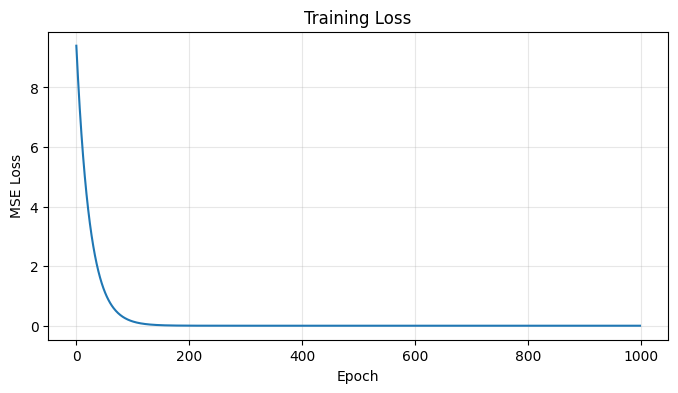

In [40]:
# Plot training loss
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.grid(True, alpha=0.3)
plt.show()

---

# Part 5: Applications

## 5.1 Working with Real Economic Data: FRED API

A key skill for economists is retrieving, cleaning, and analyzing real data. We'll use the **FRED (Federal Reserve Economic Data)** API to:

1. Download macroeconomic time series (GDP, inflation)
2. Convert nominal to real values
3. Detrend the data (extract business cycle component)
4. Visualize and analyze the results

### 5.1.1 Setting Up: Installing Required Packages

We'll use `pandas-datareader` to access FRED data and `pandas` for data manipulation.

In [41]:
# Install if needed (uncomment to run)
# !pip install pandas-datareader

import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
from scipy import signal

print(f"Pandas version: {pd.__version__}")

Pandas version: 2.3.3


### 5.1.2 Downloading Data from FRED

FRED provides thousands of economic time series. Key series codes:

| Code | Description |
|------|-------------|
| `GDP` | Nominal GDP (Billions of $) |
| `GDPC1` | Real GDP (Billions of 2017 $) |
| `GDPDEF` | GDP Deflator (Index, 2017=100) |
| `CPIAUCSL` | Consumer Price Index |
| `UNRATE` | Unemployment Rate |
| `FEDFUNDS` | Federal Funds Rate |

In [42]:
# Define date range
start_date = datetime(1960, 1, 1)
end_date = datetime(2024, 12, 31)

# Download multiple series from FRED
series_codes = {
    'GDP': 'Nominal GDP',
    'GDPC1': 'Real GDP',
    'GDPDEF': 'GDP Deflator',
    'CPIAUCSL': 'CPI',
    'UNRATE': 'Unemployment Rate'
}

# Download data
data = {}
for code, name in series_codes.items():
    try:
        data[code] = web.DataReader(code, 'fred', start_date, end_date)
        print(f"✅ Downloaded {name} ({code}): {len(data[code])} observations")
    except Exception as e:
        print(f"❌ Failed to download {code}: {e}")

# Combine into a single DataFrame
df = pd.concat(data.values(), axis=1)
df.columns = list(data.keys())

print(f"\nDataFrame shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")

✅ Downloaded Nominal GDP (GDP): 260 observations
✅ Downloaded Real GDP (GDPC1): 260 observations
✅ Downloaded GDP Deflator (GDPDEF): 260 observations
✅ Downloaded CPI (CPIAUCSL): 780 observations
✅ Downloaded Unemployment Rate (UNRATE): 780 observations

DataFrame shape: (780, 5)
Date range: 1960-01-01 00:00:00 to 2024-12-01 00:00:00


In [43]:
# Inspect the data
print("First few rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

First few rows:
                GDP     GDPC1  GDPDEF  CPIAUCSL  UNRATE
DATE                                                   
1960-01-01  542.648  3517.181  15.428     29.37     5.2
1960-02-01      NaN       NaN     NaN     29.41     4.8
1960-03-01      NaN       NaN     NaN     29.41     5.4
1960-04-01  541.080  3498.246  15.467     29.54     5.2
1960-05-01      NaN       NaN     NaN     29.57     5.1

Basic statistics:
                GDP         GDPC1      GDPDEF    CPIAUCSL      UNRATE
count    260.000000    260.000000  260.000000  780.000000  780.000000
mean    8870.652585  11619.813715   60.699081  140.584599    5.887821
std     7794.612829   5778.069795   31.955853   83.187393    1.696895
min      540.197000   3470.278000   15.428000   29.370000    3.400000
25%     1844.370750   6358.431000   29.006500   56.075000    4.700000
50%     6518.702000  10398.551000   62.688000  140.300000    5.600000
75%    14618.969000  16637.096000   88.396750  213.226750    7.000000
max    29825.

### 5.1.3 Data Cleaning and Transformation

**Converting Nominal to Real GDP:**

If we only had nominal GDP, we could compute real GDP using:
$$\text{Real GDP} = \frac{\text{Nominal GDP}}{\text{GDP Deflator}} \times 100$$

Let's verify this and compute additional variables.

In [44]:
# Work with quarterly GDP data (GDP is quarterly)
gdp_df = df[['GDP', 'GDPC1', 'GDPDEF']].dropna()

# Compute Real GDP from Nominal (verification)
gdp_df['Real_GDP_Computed'] = gdp_df['GDP'] / gdp_df['GDPDEF'] * 100

# Compare computed vs actual Real GDP
gdp_df['Difference'] = gdp_df['GDPC1'] - gdp_df['Real_GDP_Computed']

print("Verification: Computed vs Actual Real GDP")
print(f"Mean absolute difference: {gdp_df['Difference'].abs().mean():.2f} billion")
print(f"Max absolute difference: {gdp_df['Difference'].abs().max():.2f} billion")
print("\n(Small differences due to rounding in published data)")

Verification: Computed vs Actual Real GDP
Mean absolute difference: 0.05 billion
Max absolute difference: 0.13 billion

(Small differences due to rounding in published data)


In [45]:
# Compute growth rates and inflation
gdp_df['Real_GDP_Growth'] = gdp_df['GDPC1'].pct_change(4) * 100  # Year-over-year
gdp_df['Inflation'] = gdp_df['GDPDEF'].pct_change(4) * 100  # GDP deflator inflation

# Log real GDP (for detrending)
gdp_df['Log_Real_GDP'] = np.log(gdp_df['GDPC1'])

print("Added variables:")
print(gdp_df[['GDPC1', 'Real_GDP_Growth', 'Inflation', 'Log_Real_GDP']].tail(10))

Added variables:
                GDPC1  Real_GDP_Growth  Inflation  Log_Real_GDP
DATE                                                           
2022-07-01  22125.625         2.348973   7.295066     10.004492
2022-10-01  22278.345         1.317074   6.484000     10.011370
2023-01-01  22439.607         2.311146   5.352397     10.018583
2023-04-01  22580.499         2.792610   3.560750     10.024842
2023-07-01  22840.989         3.233192   3.262175     10.036312
2023-10-01  23033.780         3.390894   2.697147     10.044717
2024-01-01  23082.119         2.863294   2.544357     10.046814
2024-04-01  23286.508         3.126632   2.663222     10.055629
2024-07-01  23478.570         2.791390   2.263371     10.063843
2024-10-01  23586.542         2.399788   2.467485     10.068432


### 5.1.4 Detrending: Extracting the Business Cycle

Economic time series typically have:
- **Trend**: Long-run growth
- **Cycle**: Business cycle fluctuations
- **Noise**: Random variations

We'll use two common detrending methods:

1. **Hodrick-Prescott (HP) Filter**: Separates trend from cycle
2. **Linear Detrending**: Removes a linear trend

**HP Filter:**
$$\min_{\tau} \sum_{t=1}^{T}(y_t - \tau_t)^2 + \lambda \sum_{t=2}^{T-1}[(\tau_{t+1} - \tau_t) - (\tau_t - \tau_{t-1})]^2$$

where $\lambda$ controls smoothness (typically $\lambda = 1600$ for quarterly data).

In [46]:
def hp_filter(y, lamb=1600):
    """
    Hodrick-Prescott filter implementation.
    
    Parameters:
    -----------
    y : array-like
        Time series to filter
    lamb : float
        Smoothing parameter (1600 for quarterly, 100 for annual)
    
    Returns:
    --------
    trend : array
        Trend component
    cycle : array
        Cyclical component
    """
    y = np.asarray(y)
    T = len(y)
    
    # Construct the penalty matrix
    # Second difference matrix D
    D = np.zeros((T-2, T))
    for i in range(T-2):
        D[i, i] = 1
        D[i, i+1] = -2
        D[i, i+2] = 1
    
    # Solve: (I + lambda * D'D) * trend = y
    I = np.eye(T)
    A = I + lamb * D.T @ D
    trend = np.linalg.solve(A, y)
    cycle = y - trend
    
    return trend, cycle

# Apply HP filter to log real GDP
log_gdp = gdp_df['Log_Real_GDP'].dropna().values
trend_hp, cycle_hp = hp_filter(log_gdp, lamb=1600)

print(f"HP Filter applied to {len(log_gdp)} observations")
print(f"Cycle std dev: {np.std(cycle_hp) * 100:.2f}%")

HP Filter applied to 260 observations
Cycle std dev: 1.51%


In [49]:
def linear_detrend(y):
    """
    Remove a linear trend from time series.
    
    Returns:
    --------
    trend : array
        Linear trend
    detrended : array
        Detrended series
    """
    y = np.asarray(y)
    T = len(y)
    t = np.arange(T)
    
    # OLS: y = a + b*t + residual
    X = np.column_stack([np.ones(T), t])
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    trend = X @ coeffs
    detrended = y - trend
    
    return trend, detrended, coeffs

# Apply linear detrending
trend_linear, cycle_linear, coeffs = linear_detrend(log_gdp)

print(f"Linear trend: log(GDP) = {coeffs[0]:.4f} + {coeffs[1]:.6f} * t")
print(f"Implied quarterly growth rate: {coeffs[1] * 100:.2f}%")
print(f"Implied annual growth rate: {coeffs[1] * 4 * 100:.2f}%")

Linear trend: log(GDP) = 8.2887 + 0.007210 * t
Implied quarterly growth rate: 0.72%
Implied annual growth rate: 2.88%


### 5.1.5 Visualization: Original vs Detrended Data

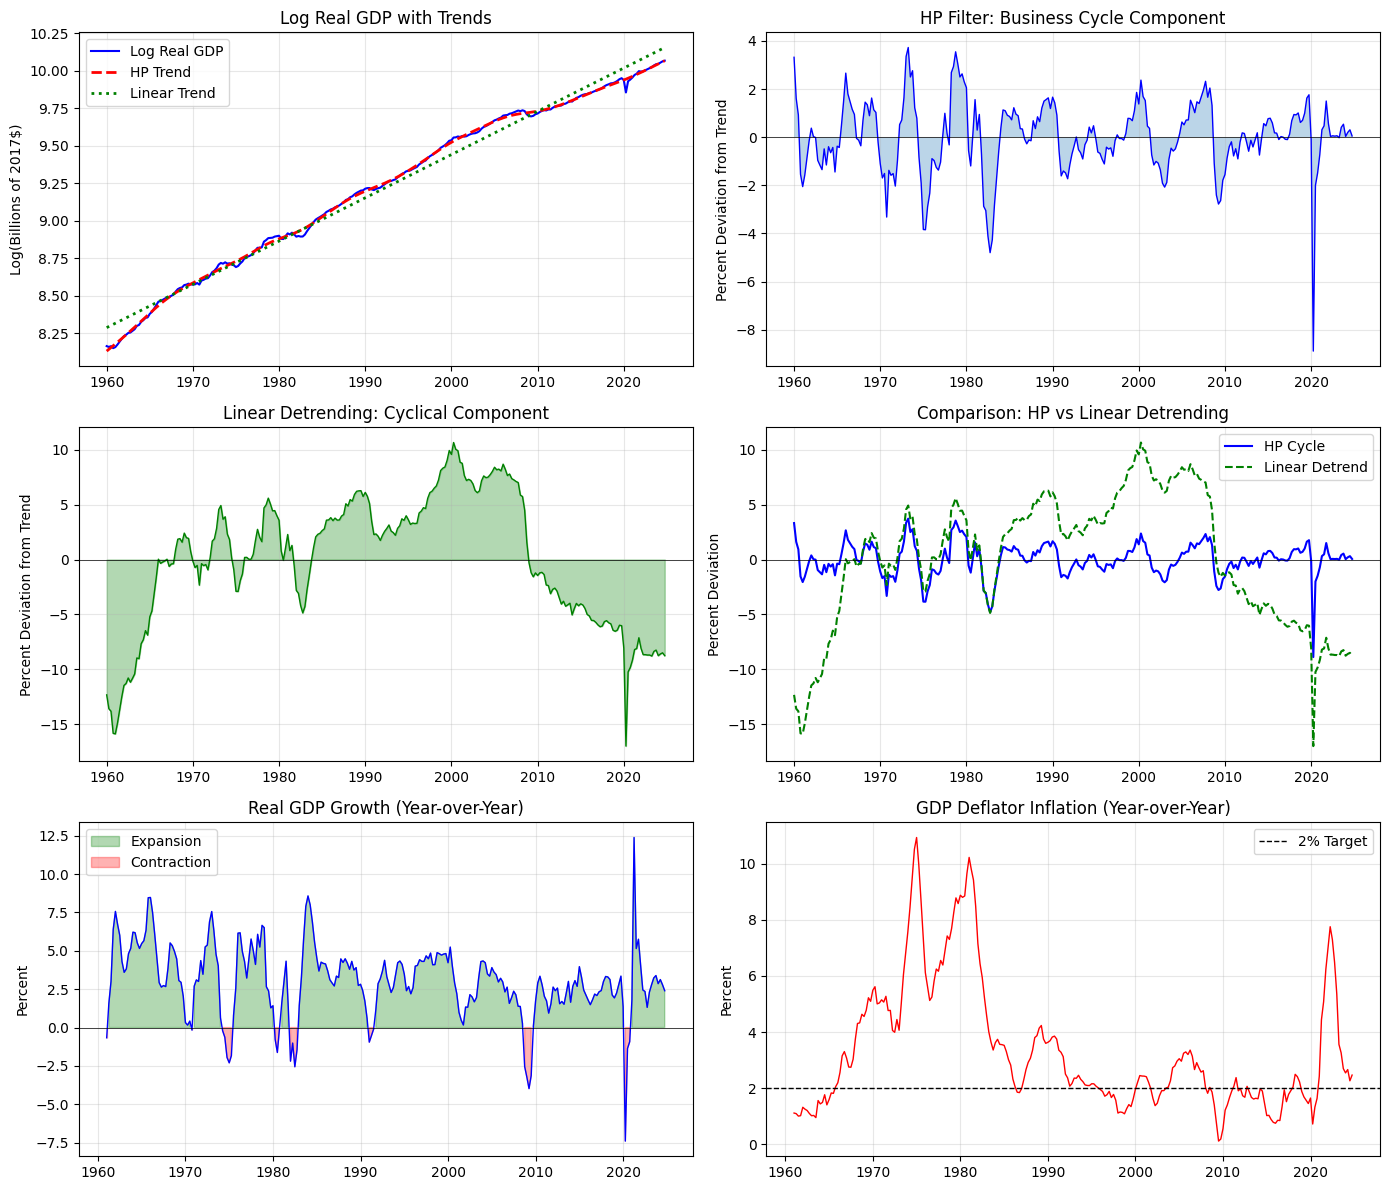

In [50]:
# Create date index for plotting
dates = gdp_df['Log_Real_GDP'].dropna().index

fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# 1. Original Log GDP with Trends
ax = axes[0, 0]
ax.plot(dates, log_gdp, 'b-', label='Log Real GDP', linewidth=1.5)
ax.plot(dates, trend_hp, 'r--', label='HP Trend', linewidth=2)
ax.plot(dates, trend_linear, 'g:', label='Linear Trend', linewidth=2)
ax.set_title('Log Real GDP with Trends')
ax.set_ylabel('Log(Billions of 2017$)')
ax.legend()
ax.grid(True, alpha=0.3)

# 2. HP Cycle (Business Cycle Component)
ax = axes[0, 1]
ax.plot(dates, cycle_hp * 100, 'b-', linewidth=1)
ax.axhline(0, color='k', linestyle='-', linewidth=0.5)
ax.fill_between(dates, cycle_hp * 100, 0, alpha=0.3)
ax.set_title('HP Filter: Business Cycle Component')
ax.set_ylabel('Percent Deviation from Trend')
ax.grid(True, alpha=0.3)

# 3. Linear Detrended
ax = axes[1, 0]
ax.plot(dates, cycle_linear * 100, 'g-', linewidth=1)
ax.axhline(0, color='k', linestyle='-', linewidth=0.5)
ax.fill_between(dates, cycle_linear * 100, 0, alpha=0.3, color='green')
ax.set_title('Linear Detrending: Cyclical Component')
ax.set_ylabel('Percent Deviation from Trend')
ax.grid(True, alpha=0.3)

# 4. Comparison of Cycles
ax = axes[1, 1]
ax.plot(dates, cycle_hp * 100, 'b-', label='HP Cycle', linewidth=1.5)
ax.plot(dates, cycle_linear * 100, 'g--', label='Linear Detrend', linewidth=1.5)
ax.axhline(0, color='k', linestyle='-', linewidth=0.5)
ax.set_title('Comparison: HP vs Linear Detrending')
ax.set_ylabel('Percent Deviation')
ax.legend()
ax.grid(True, alpha=0.3)

# 5. Real GDP Growth Rate
ax = axes[2, 0]
growth = gdp_df['Real_GDP_Growth'].dropna()
ax.plot(growth.index, growth.values, 'b-', linewidth=1)
ax.axhline(0, color='k', linestyle='-', linewidth=0.5)
ax.fill_between(growth.index, growth.values, 0, 
                where=growth.values >= 0, alpha=0.3, color='green', label='Expansion')
ax.fill_between(growth.index, growth.values, 0, 
                where=growth.values < 0, alpha=0.3, color='red', label='Contraction')
ax.set_title('Real GDP Growth (Year-over-Year)')
ax.set_ylabel('Percent')
ax.legend()
ax.grid(True, alpha=0.3)

# 6. Inflation
ax = axes[2, 1]
inflation = gdp_df['Inflation'].dropna()
ax.plot(inflation.index, inflation.values, 'r-', linewidth=1)
ax.axhline(2, color='k', linestyle='--', linewidth=1, label='2% Target')
ax.set_title('GDP Deflator Inflation (Year-over-Year)')
ax.set_ylabel('Percent')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.1.6 Business Cycle Statistics

Let's compute standard business cycle statistics that macroeconomists use.

In [51]:
def compute_bc_statistics(cycle, name="Series"):
    """
    Compute standard business cycle statistics.
    """
    cycle = np.asarray(cycle) * 100  # Convert to percent
    
    stats = {
        'Standard Deviation (%)': np.std(cycle),
        'Mean (%)': np.mean(cycle),
        'Min (%)': np.min(cycle),
        'Max (%)': np.max(cycle),
        'Autocorrelation (lag 1)': np.corrcoef(cycle[1:], cycle[:-1])[0, 1],
        'Autocorrelation (lag 4)': np.corrcoef(cycle[4:], cycle[:-4])[0, 1]
    }
    
    print(f"\n=== {name} ===")
    for key, val in stats.items():
        print(f"{key}: {val:.3f}")
    
    return stats

# Compute statistics for HP-filtered GDP
stats_gdp = compute_bc_statistics(cycle_hp, "Real GDP (HP Filtered)")


=== Real GDP (HP Filtered) ===
Standard Deviation (%): 1.507
Mean (%): 0.000
Min (%): -8.889
Max (%): 3.726
Autocorrelation (lag 1): 0.773
Autocorrelation (lag 4): 0.173


In [ ]:
# Add unemployment and analyze its cyclical properties
# Merge unemployment (monthly) with GDP (quarterly)
unemp = df['UNRATE'].dropna()

# Resample to quarterly
unemp_quarterly = unemp.resample('QS').mean()

# HP filter unemployment
unemp_clean = unemp_quarterly.dropna().values
trend_unemp, cycle_unemp = hp_filter(unemp_clean, lamb=1600)

stats_unemp = compute_bc_statistics(cycle_unemp / 100, "Unemployment Rate (HP Filtered)")

# Correlation between GDP cycle and unemployment cycle
# Align the series
min_len = min(len(cycle_hp), len(cycle_unemp))
corr = np.corrcoef(cycle_hp[-min_len:], cycle_unemp[-min_len:])[0, 1]
print(f"\nCorrelation (GDP cycle, Unemployment cycle): {corr:.3f}")
print("(Negative correlation confirms Okun's Law)")

In [ ]:
# Plot GDP and Unemployment cycles together
fig, ax = plt.subplots(figsize=(12, 5))

dates_gdp = gdp_df['Log_Real_GDP'].dropna().index
dates_unemp = unemp_quarterly.dropna().index

ax.plot(dates_gdp, cycle_hp * 100, 'b-', label='Real GDP Cycle (%)', linewidth=1.5)
ax.plot(dates_unemp, cycle_unemp, 'r--', label='Unemployment Cycle (pp)', linewidth=1.5)
ax.axhline(0, color='k', linestyle='-', linewidth=0.5)

# Shade NBER recessions (simplified: just major ones)
recessions = [
    ('1973-11-01', '1975-03-01'),
    ('1980-01-01', '1980-07-01'),
    ('1981-07-01', '1982-11-01'),
    ('1990-07-01', '1991-03-01'),
    ('2001-03-01', '2001-11-01'),
    ('2007-12-01', '2009-06-01'),
    ('2020-02-01', '2020-04-01')
]
for start, end in recessions:
    ax.axvspan(pd.Timestamp(start), pd.Timestamp(end), alpha=0.2, color='gray')

ax.set_title('Business Cycle: Real GDP and Unemployment (HP Filtered)')
ax.set_ylabel('Percent Deviation from Trend')
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)
ax.set_xlim(pd.Timestamp('1970-01-01'), dates_gdp[-1])

plt.tight_layout()
plt.show()

print("\nGray shaded areas indicate NBER recession dates")

### 5.1.7 Summary: Data Pipeline

We've built a complete data pipeline:

1. **Data Retrieval**: `pandas_datareader` to fetch from FRED
2. **Data Cleaning**: Handle missing values, merge series
3. **Transformation**: Compute real values, growth rates, log transformation
4. **Detrending**: HP filter and linear detrending
5. **Analysis**: Business cycle statistics, correlations
6. **Visualization**: Multiple plot types

This workflow is fundamental for empirical macroeconomics research.

---

## 5.2 Two-Period Consumption Problem

**Problem**: Agent lives for 2 periods, maximizes utility:
$$\max_{c_1, c_2} u(c_1) + \beta u(c_2)$$
subject to budget constraint:
$$c_1 + \frac{c_2}{1+r} = W$$

In [ ]:
def solve_consumption(agent, W, r):
    """
    Solve the two-period consumption problem.
    
    Parameters:
    -----------
    agent : EconomicAgent
        Agent with utility function
    W : float
        Initial wealth
    r : float
        Interest rate
    
    Returns:
    --------
    c1, c2 : float
        Optimal consumption in periods 1 and 2
    """
    def objective(c1):
        # c2 from budget constraint
        c2 = (1 + r) * (W - c1)
        # Negative total utility (we minimize)
        return -(agent.utility(c1) + agent.beta * agent.utility(c2))
    
    # Optimize
    result = optimize.minimize_scalar(
        objective, 
        bounds=(1e-5, W - 1e-5), 
        method='bounded'
    )
    
    c1_star = result.x
    c2_star = (1 + r) * (W - c1_star)
    
    return c1_star, c2_star

# Solve
agent = EconomicAgent(beta=0.96, gamma=2.0)
W, r = 100, 0.05

c1, c2 = solve_consumption(agent, W, r)
print(f"Optimal c1: {c1:.2f}")
print(f"Optimal c2: {c2:.2f}")

# Validate Euler equation: u'(c1) = beta * (1+r) * u'(c2)
lhs = agent.marginal_utility(c1)
rhs = agent.beta * (1 + r) * agent.marginal_utility(c2)
print(f"\nEuler equation check:")
print(f"  u'(c1) = {lhs:.4f}")
print(f"  beta*(1+r)*u'(c2) = {rhs:.4f}")
print(f"  Error: {abs(lhs - rhs):.6f}")

## 5.3 Training a Neural Network on Economic Data

Let's train a neural network to approximate a policy function.

In [ ]:
# Generate data from a "true" policy function
# True policy: k' = alpha * beta * k^alpha (from optimal growth with log utility)
alpha, beta = 0.33, 0.96

torch.manual_seed(42)
N = 1000
k = torch.rand(N, 1) * 5 + 0.1  # Capital in [0.1, 5.1]
k_prime_true = alpha * beta * k ** alpha

# Add some noise
k_prime_noisy = k_prime_true + 0.01 * torch.randn(N, 1)

print(f"Training data: {N} samples")
print(f"Input (k) range: [{k.min():.2f}, {k.max():.2f}]")
print(f"Output (k') range: [{k_prime_noisy.min():.2f}, {k_prime_noisy.max():.2f}]")

In [ ]:
# Define neural network
class PolicyNet(nn.Module):
    def __init__(self):
        super(PolicyNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

# Initialize
model = PolicyNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
losses = []
for epoch in range(500):
    # Forward
    k_prime_pred = model(k)
    loss = criterion(k_prime_pred, k_prime_noisy)
    
    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

print(f"\nFinal Loss: {losses[-1]:.6f}")

In [ ]:
# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Training loss
axes[0].plot(losses)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE Loss')
axes[0].set_title('Training Loss')
axes[0].grid(True, alpha=0.3)

# Policy function comparison
k_test = torch.linspace(0.1, 5, 100).unsqueeze(1)
with torch.no_grad():
    k_prime_nn = model(k_test)

k_prime_analytical = alpha * beta * k_test ** alpha

axes[1].plot(k_test.numpy(), k_prime_nn.numpy(), 'b-', label='Neural Network', linewidth=2)
axes[1].plot(k_test.numpy(), k_prime_analytical.numpy(), 'r--', label='True Policy', linewidth=2)
axes[1].scatter(k.numpy()[::20], k_prime_noisy.numpy()[::20], alpha=0.3, s=10, label='Training Data')
axes[1].set_xlabel('Current Capital $k$')
axes[1].set_ylabel('Next Capital $k\'$')
axes[1].set_title('Learned vs True Policy Function')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

# Summary

## Key Takeaways

1. **Python Basics**: Variables, data types, control structures, functions
2. **Classes**: Bundle data and methods; essential for organizing complex models
3. **NumPy**: Fast vectorized operations on arrays
4. **PyTorch Tensors**: Like NumPy arrays but with GPU support and autograd
5. **Autograd**: Automatic differentiation via `.backward()`
6. **Neural Networks**: Build with `nn.Module`, train with forward-backward-update loop
7. **Data Pipeline**: Retrieve data from FRED, clean, transform, detrend, and visualize

## Skills Acquired

| Skill | Tools Used |
|-------|------------|
| Data retrieval | `pandas_datareader`, FRED API |
| Data manipulation | `pandas` DataFrames |
| Numerical computing | `numpy`, vectorization |
| Time series analysis | HP filter, detrending |
| Visualization | `matplotlib` |
| Deep learning | `torch`, `nn.Module` |
| Optimization | `scipy.optimize` |

## Next Steps

In **Lab 5**, we dive deeper into machine learning:
- Neural network architectures
- Solving the optimal growth model with neural networks
- Value Function Iteration vs. neural network approximation

---
*You are the architect. Python and PyTorch are your tools.*